# Libraries

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [198]:
df_sales = pd.read_csv('data/df_sales.csv')

In [199]:
df_sales.head()

,user_id,day,sales
0,2661066,0,397
1,3848565,1,841
2,3848565,2,423
3,3848565,4,826
4,3848565,6,859


In [200]:
df_users = pd.read_csv('data/df_users.csv')

In [201]:
df_users.head()

,user_id,gender,age
0,2661066,0,22
1,3848565,1,29
2,5801450,0,24
3,1041736,0,27
4,9545654,1,25


In [202]:
df_sales.shape, df_users.shape

((39530489, 3), (1000000, 3))

# EDA

In [203]:
df_sales_grouped = df_sales.groupby('day', as_index=False)['sales'].count()

In [204]:
df_sales_grouped.head()

,day,sales
0,0,531875
1,1,715209
2,2,767531
3,3,762620
4,4,765802


<Axes: xlabel='day', ylabel='sales'>

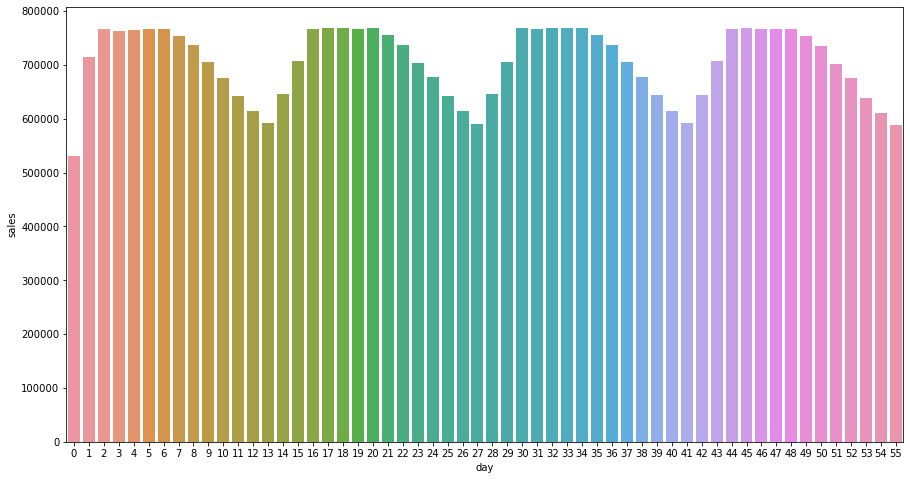

In [118]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df_sales_grouped, x='day', y='sales')

In [153]:
df_users.groupby(pd.qcut(df_users['age'], q=5))['user_id'].count()

age
(16.999, 23.0]    287962
(23.0, 25.0]      211454
(25.0, 27.0]      175446
(27.0, 30.0]      169000
(30.0, 60.0]      156138
Name: user_id, dtype: int64

In [156]:
df_users.groupby(pd.cut(df_users['age'], bins=5)).size()

age
(16.957, 25.6]    499416
(25.6, 34.2]      446034
(34.2, 42.8]       47957
(42.8, 51.4]        5953
(51.4, 60.0]         640
dtype: int64

In [157]:
def _stratify(df):
    df['strat_age'] = 0
    df.loc[(df['age'] > 23) & (df['age'] <= 25), 'strat_age'] = 1
    df.loc[(df['age'] > 25) & (df['age'] <= 27), 'strat_age'] = 2
    df.loc[(df['age'] > 27) & (df['age'] <= 30), 'strat_age'] = 3
    df.loc[df['age'] > 30, 'strat_age'] = 4

    df['strat'] = df.groupby(['strat_age', 'gender']).ngroup()

    return df

In [158]:
df_stratified = _stratify(df_users)

In [160]:
df_stratified.head()

,user_id,gender,age,strat_age,strat
0,2661066,0,22,0,0
1,3848565,1,29,3,7
2,5801450,0,24,1,2
3,1041736,0,27,2,4
4,9545654,1,25,1,3


In [191]:
df_pilot = (df_sales[df_sales['day'].isin(np.arange(49, 55))]
            .groupby('user_id', as_index=False)['sales']
            .sum()
            .merge(df_stratified, how='left', on='user_id'))

In [192]:
df_pilot

,user_id,sales,gender,age,strat_age,strat
0,1000002,1697,1,30,3,7
1,1000013,707,0,27,2,4
2,1000028,507,1,20,0,1
3,1000043,2048,0,24,1,2
4,1000061,2405,0,23,0,0
...,...,...,...,...,...,...
858315,9999955,430,0,23,0,0
858316,9999957,1700,0,28,3,6
858317,9999958,2510,0,25,1,2
858318,9999968,5003,0,21,0,0


<Axes: xlabel='sales', ylabel='Count'>

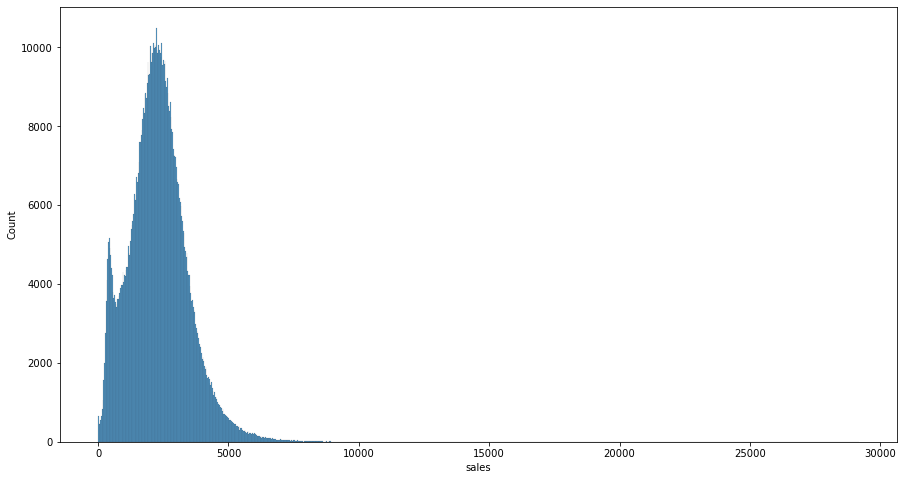

In [193]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df_pilot, x='sales')

In [194]:
df_pilot['sales'].quantile([0.9, 0.95, 0.99])

0.90    3704.00
0.95    4257.05
0.99    5620.00
Name: sales, dtype: float64

In [186]:
df_pilot['sales_clipped'] = df_sales['sales'].clip(upper=1727)

<Axes: xlabel='sales_clipped', ylabel='Count'>

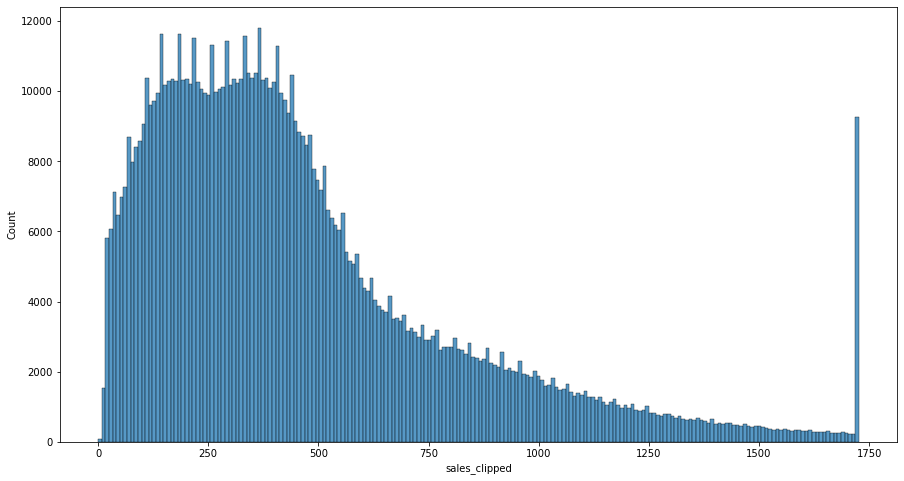

In [187]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df_pilot, x='sales_clipped')

<Axes: xlabel='strat', ylabel='sales'>

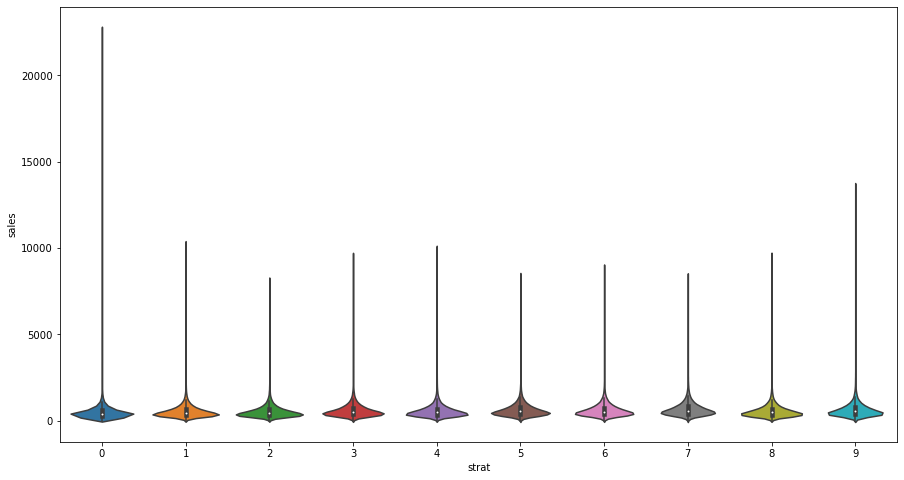

In [189]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=df_pilot, x='strat', y='sales')

<Axes: xlabel='strat', ylabel='sales_clipped'>

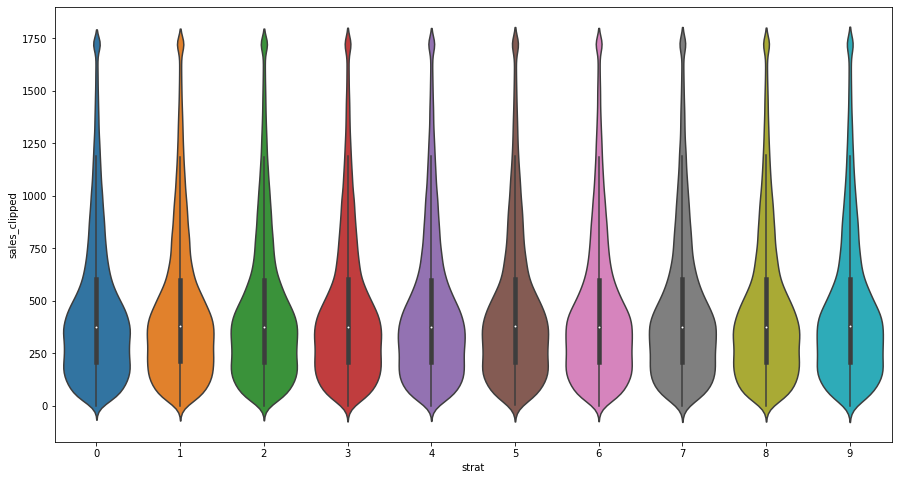

In [190]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=df_pilot, x='strat', y='sales_clipped')